# Working with Image Data and Image Augmentation

- CNNs require a huge volume of image data
- If you don't have enough images for training, you can use image augmentation techniques to increase the sample size and improve performance (Oversampling)
- It's a technique used to artificially expand the size of an image dataset by generating modified versions of the original images
- The result is better performance nad model robustness in CNN
- Common image augmentation techniques:
    - **Geometric**: Rotation, Translation(shifting), Scaling, Flipping, and Cropping
    - **Color**: Brightness, Contrast, Saturation, etc...
    - **Quality**: Blur, Random Noise, Noise Injection, etc...

- Image augmentation artificially expands the training dataset by applying random (but reasonable) transformation to images
- Finalized advantages:
  - Reduce Overfitting
  - Improve Model Generalization
  - Balance Imbalanced Classes
  - Making the Model Robust 
  - Reducing Dependency on Large Datasets

In [ ]:
import skimage as ski
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
my_image = ski.io.imread('https://us.123rf.com/450wm/paman2518/paman25181511/paman2518151100024/49117347-sky-and-sunset-with-rainblow-background.jpg')
my_image

array([[[109,  83, 108],
        [108,  84, 108],
        [109,  85, 109],
        ...,
        [ 59,  75, 100],
        [ 58,  74,  99],
        [ 57,  75,  99]],

       [[113,  85, 108],
        [114,  84, 108],
        [114,  84, 108],
        ...,
        [ 59,  75, 100],
        [ 59,  75, 100],
        [ 59,  75, 100]],

       [[118,  86, 110],
        [119,  85, 110],
        [119,  85, 109],
        ...,
        [ 60,  76, 101],
        [ 59,  75, 100],
        [ 59,  77, 101]],

       ...,

       [[ 97,  61,  35],
        [ 99,  62,  35],
        [ 99,  62,  35],
        ...,
        [ 46,  36,  26],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       [[ 97,  61,  35],
        [ 98,  61,  34],
        [ 98,  61,  34],
        ...,
        [ 45,  35,  25],
        [ 44,  36,  25],
        [ 44,  36,  25]],

       [[ 97,  62,  34],
        [ 98,  61,  34],
        [ 98,  61,  34],
        ...,
        [ 43,  34,  25],
        [ 43,  35,  24],
        [ 44,  36,  25]]

> Note: the code above extracts the numerical values of the image into a tensor/array. However, Google Colab renders the the image in the output. to see the array values, click on "show data"

In [3]:
np.ndim(my_image)

3

In [4]:
np.shape(my_image)

(300, 450, 3)

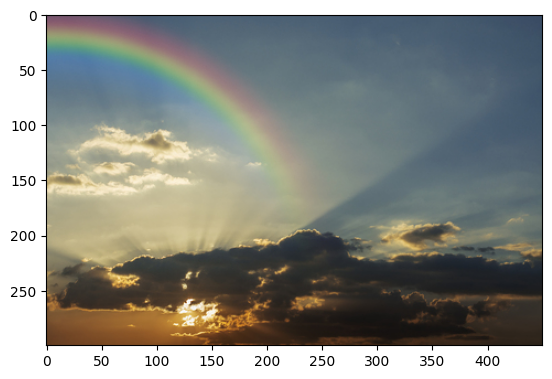

In [4]:
# plot the image
plt.imshow(my_image)

## Visualize Different Channels

Text(0.5, 1.0, 'Blue Channel')

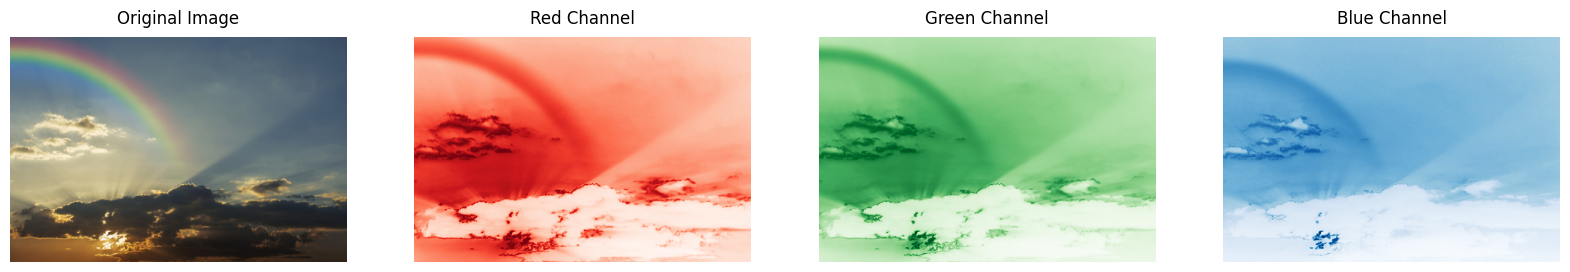

In [7]:
fig, (full_cols, red_col, green_col, blue_col) = plt.subplots(1, 4, figsize=(20, 10))

full_cols.imshow(my_image)
red_col.imshow(my_image[:,:,0], cmap='Reds')
green_col.imshow(my_image[:,:,1], cmap='Greens')
blue_col.imshow(my_image[:,:,2], cmap='Blues')

# Turn off axes for all subplots
for ax in [full_cols, red_col, green_col, blue_col]:
    ax.axis('off')
    #ax.set_title()

# Add titles
full_cols.set_title('Original Image', pad=10)
red_col.set_title('Red Channel', pad=10)
green_col.set_title('Green Channel', pad=10)
blue_col.set_title('Blue Channel', pad=10)
#manual    
#full_cols.axis('off')
#red_col.axis('off')
#green_col.axis('off')
#blue_col.axis('off')

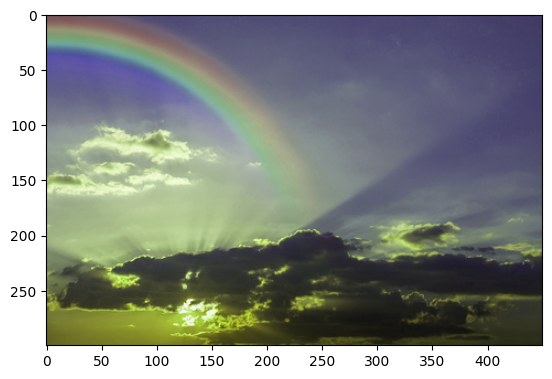

In [ ]:
img_hue_change = tf.image.adjust_hue(my_image, 0.1)
plt.imshow(img_hue_change)

## Flip Augmentation

In [ ]:
samples = np.expand_dims(my_image, axis=0)

my_image_gen = ImageDataGenerator(horizontal_flip=True)


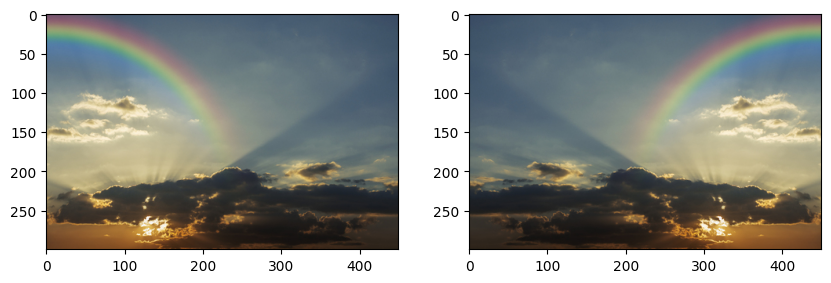

In [ ]:
my_image_gen_flow = my_image_gen.flow(samples, batch_size=1)

fig, (original_img, flipped_img) = plt.subplots(1, 2, figsize=(10, 10))

original_img.imshow(my_image)
final_aug = next(my_image_gen_flow)[0].astype('uint8') # optional for plotting - converting the image to a matplotlib readable codec
flipped_img.imshow(final_aug)

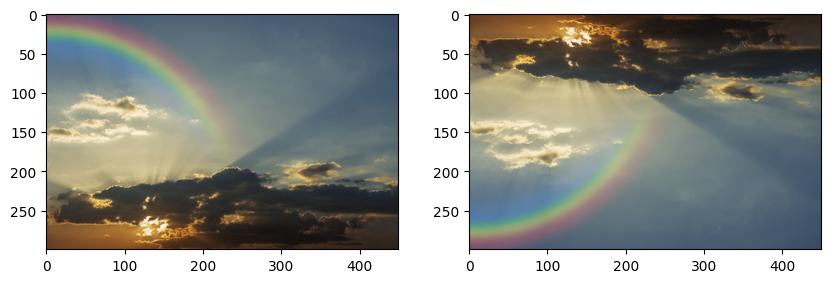

In [ ]:
samples = np.expand_dims(my_image, axis=0)

my_image_gen2 = ImageDataGenerator(vertical_flip=True)
my_image_gen_flow2 = my_image_gen2.flow(samples, batch_size=1)

fig, (original_img, flipped_img) = plt.subplots(1, 2, figsize=(10, 10))

original_img.imshow(my_image)
final_aug2 = next(my_image_gen_flow2)[0].astype('uint8') # optional for plotting - converting the image to a matplotlib readable codec
flipped_img.imshow(final_aug2)


## Shift Augmentation

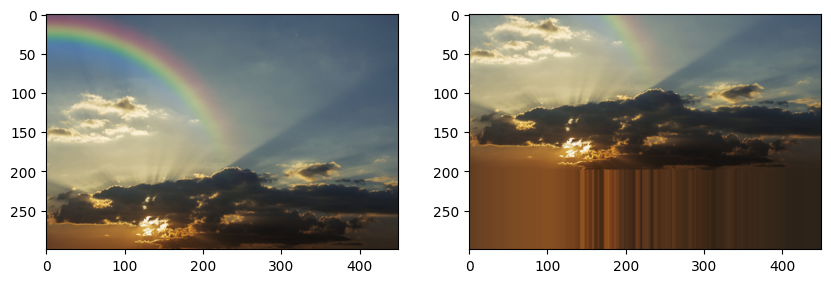

In [ ]:
samples = np.expand_dims(my_image, axis=0)

my_image_gen3 = ImageDataGenerator(width_shift_range=[-100,100])
my_image_gen_flow3 = my_image_gen3.flow(samples, batch_size=1)

fig, (original_img, flipped_img) = plt.subplots(1, 2, figsize=(10, 10))

original_img.imshow(my_image)
final_aug3 = next(my_image_gen_flow3)[0].astype('uint8') # optional for plotting - converting the image to a matplotlib readable codec
flipped_img.imshow(final_aug3)


> NOTE: The shift amount used here is very high to show the effect. Typically, you want to use a small shift value. e.g. 5 or 10

## How do we apply it?

Let's say you have a batch of images:

### Using `ImageDataGenerator`

In [ ]:
# define aug method
img_gen = ImageDataGenerator(horizontal_flip=True
                             , rotation_range=30 # rotate between 0 and 30
                             , height_shift_range=5
                             , width_shift_range=5
                             , zoom_range=.3)

In [ ]:
# apply to training data
train_data_gen = img_gen.flow(X_train, y_train, batch_size=32)


# apply to training data from a directory - train subfolder insde data dir
train_data_gen = img_gen.flow_from_directory('data/train', batch_size=32
                                             , target=(150,150) #normalizes the image size
                                             )


### Using Augmentation Layers

In [ ]:
img_aug = models.Sequential([

                      layers.RandomFlip('horizontal'),
                      layers.RandomRotation(0.12),
                      layers.RandomZoom(0.07)
                      ])